In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm
from statsmodels.regression import linear_model

In [ ]:
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

In [ ]:
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [ ]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
X = X[:, 2:4]
feature_names = diabetes.feature_names[2:4]

In [ ]:
from numpy.lib.function_base import trapz
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

reg_sklearn = LinearRegression().fit(X_train, y_train)
y_pred = reg_sklearn.predict(X_test)

In [ ]:
print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean squared error: 3740.5240126834133
Coefficient of determination: 0.29399454937644987


In [ ]:
print("Coefficients: ", reg_sklearn.coef_)
print("Coefficients: ", reg_sklearn.intercept_)

Coefficients:  [839.51667431 393.45441824]
Coefficients:  151.81540177213495


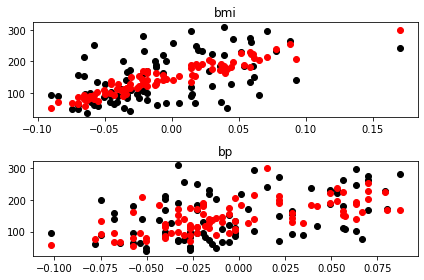

In [ ]:
fig, ax = plt.subplots(2)
for i in range(len(feature_names)):
  ax[i].scatter(X_test[:, i], y_test, color="black")
  ax[i].scatter(X_test[:, i], y_pred, color="red", )
  ax[i].set_title(feature_names[i])

  plt.xticks()
  plt.yticks()
fig.tight_layout()
plt.show()

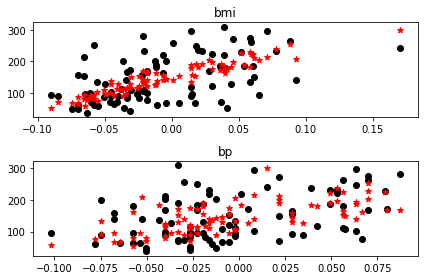

In [ ]:
fig, ax = plt.subplots(2)
for i in range(len(feature_names)):
  ax[i].scatter(X_test[:, i], y_test, color="black")
  ax[i].scatter(X_test[:, i], y_pred, color="red", marker='*')
  ax[i].set_title(feature_names[i])

  plt.xticks()
  plt.yticks()
fig.tight_layout()
plt.show()

In [ ]:
reg_sm = linear_model.OLS(y_train, X_train).fit()
reg_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.106
Model:                            OLS   Adj. R-squared (uncentered):              0.101
Method:                 Least Squares   F-statistic:                              20.81
Date:                Wed, 12 Oct 2022   Prob (F-statistic):                    2.88e-09
Time:                        18:50:44   Log-Likelihood:                         -2298.9
No. Observations:                 353   AIC:                                      4602.
Df Residuals:                     351   BIC:                                      4610.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           942.7799    200.431      4.704      0.000     548.583    1336.977
x2           430.0588    195.570      2.199      0.029      45.423     814.695
==============================================================================
Omnibus:                        8.548   Durbin-Watson:                   0.238
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                4.873
Skew:                           0.060   Prob(JB):                       0.0875
Kurtosis:                       2.437   Cond. No.                         1.52
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Zadanie 3
Dlaczego regresja z statsmodels zwraca inne wyniki niż regresja z scikit-learn? Znajdź błąd w implementacji modelu ze statsmodel i popraw.

Scikit-learn bierze pod uwagę intercept coeficient w sposób domyśly, a statsmodels nie uwzględnia go. Aby poprawić wynik generowany przez bibliotekę scikit-learn należy dodać stała do zbioru X_train. 

In [ ]:
# Zadanie 3
X_train = sm.add_constant(X_train)
reg_sm = linear_model.OLS(y_train, X_train).fit()
reg_sm.summary()

## Zadanie 4
Jak ocenić, czy model regresji liniowej zwraca sensowne wyniki? Przeanalizuj wynik funkcji .summary(). Opisz 5 wybranych parametrów i opisz, jak zinterpretować ich wartości. 

Aby ocenić czy model regresji liniowej zwraca sensowne wyniki dzielimy nasz zbiór danych na dwie części: uczącą i testową. Na podstawie danych uczących wyznaczamy linię trendu, a z pomocą dancyh testowych możemy ocenić czy model regresji jest słuszny. W obu przypadkach możemy zastosować least squares method. 

1. Df Residuals - stopnie swobody układu. Wyliczane jako różnica liczby obserwacji oraz liczby zmiennych predykcyjnych. 

2. R-squared (sum squared regression) - jego wartość informuje nas o wiarygodności modelu. Im wyższy tym lepiej. 

3. Adjusted R-squared - Dla pojedynczej regresji liniowej powyższe dwa parametry są równe. Skorygowany współczynnik R-squared zależy dodatkowo od liczby zmiennych w modelu. 

4. coef -  kolumna coef reprezentuje współczynniki dla każdej zmiennej niezależnej. Te współczynniki wyznaczja równanie prostej. 

5. F-statistic - globalna statystka będąca wynikiem funkcji test F. Wyraża możliwości prognozy modelu regresji. Sprawdza, czy wszystkie współczyniki w modelu pomijalne. 
